In [23]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import community
import csv
import matplotlib
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
from collections import Counter
from community import community_louvain

Total number of Edges= 21618
Total number of Nodes= 9457


PowerIterationFailedConvergence: (PowerIterationFailedConvergence(...), 'power iteration failed to converge within 100 iterations')

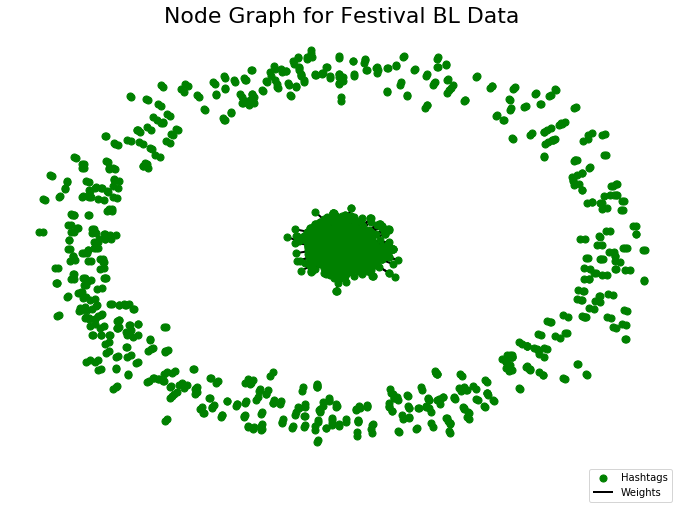

In [24]:
# Figure Dimensions
value_height=9
value_width=16
matplotlib.rcParams['figure.figsize']=[12, 8]

# Reading in the data 
df = pd.read_excel('C:/...../glaston_BL_edges_CD.xlsx')

# Creating a graph from a pandas dataframe
G = nx.from_pandas_edgelist(df, 'Source', 'Target', 'Weights')
for index, row in df.iterrows():
    G.add_edge(row['Source'], row['Target'])
    
# Position nodes using Fruchterman-Reingold force-directed algorithm
pos = nx.spring_layout(G)
# Drawing the graph
nx.draw_networkx_nodes(G, pos, with_labels=True, node_size=50,font_size=7,node_color='green', label='Hashtags')
nx.draw_networkx_edges(G, pos, with_labels=False, width=2.0,label='Weights')
plt.title('Node Graph for Festival BL Data', fontsize=22)
plt.box(on=None)
plt.axis('off')
plt.legend(bbox_to_anchor=(1, 0), loc='best', ncol=1)
plt.savefig('C:/..../base.png', dpi=400)

# Additional metrics
print("Total number of Edges=", len(G.edges()))
print("Total number of Nodes=", len(G.nodes()))
# Centrality Metrics

# Calculating Centrality metrics for the Graph

dict_degree_centrality = nx.degree_centrality(G)
dict_closeness_centrality = nx.closeness_centrality(G)
dict_eigenvector_centrality = nx.eigenvector_centrality(G)

# Top 10 nodes with the largest values of degree centrality in descending order
dict(Counter(dict_degree_centrality).most_common(10))

In [25]:
# Centrality Metrics

# Calculating Centrality metrics for the Graph

dict_degree_centrality = nx.degree_centrality(G)
dict_closeness_centrality = nx.closeness_centrality(G)
dict_eigenvector_centrality = nx.eigenvector_centrality(G)

# Top 10 nodes with the largest values of degree centrality in descending order
dict(Counter(dict_degree_centrality).most_common(10))

PowerIterationFailedConvergence: (PowerIterationFailedConvergence(...), 'power iteration failed to converge within 100 iterations')

In [ ]:
# Top 10 nodes with the largest values of closeness centrality in descending order
dict(Counter(dict_closeness_centrality).most_common(10))

PowerIterationFailedConvergence: (PowerIterationFailedConvergence(...), 'power iteration failed to converge within 100 iterations')

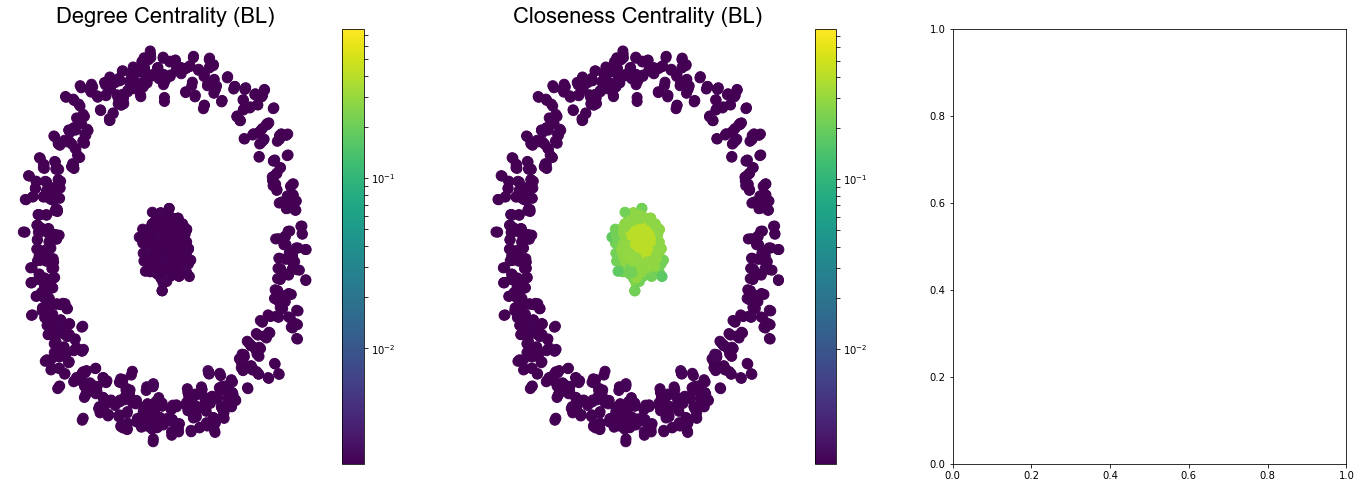

In [26]:
# Function to plot the graphs for each centrality metric
matplotlib.rcParams['figure.figsize']= [24, 8]
def draw(G, pos, lista, listb, measure_name):
    nodes=nx.draw_networkx_nodes(G, pos, node_size=100, cmap=plt.cm.viridis,node_color=lista,nodelist=listb)
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))
    edges=nx.draw_networkx_edges(G, pos)
    plt.title(measure_name, fontsize=22, fontname='Arial')
    plt.colorbar(nodes)
    plt.axis('off')

plt.subplot(1,3,1)
list_pos_values = []
for i in nx.degree_centrality(G).values():
    list_pos_values.append(i)
    list_pos_keys=[]
for i in nx.degree_centrality(G).keys():
    list_pos_keys.append(i)
draw(G, pos, list_pos_values, list_pos_keys, 'Degree Centrality (BL)')

plt.subplot(1,3,2)
list_pos_values=[]
for i in nx.closeness_centrality(G).values():
    list_pos_values.append(i)
    list_pos_keys=[]
for i in nx.closeness_centrality(G).keys():
    list_pos_keys.append(i)
draw(G, pos, list_pos_values, list_pos_keys, 'Closeness Centrality (BL)')

plt.subplot(1,3,3)
list_pos_values=[]
for i in nx.eigenvector_centrality(G).values():
    list_pos_values.append(i)
    list_pos_keys=[]
for i in nx.eigenvector_centrality(G).keys():
    list_pos_keys.append(i)
draw(G, pos, list_pos_values, list_pos_keys, 'Eigenvector Centrality (BL)')
plt.savefig('C:/....../centrality_summary.png' , dpi=400)

In [27]:
# Starting with an initial partition of the graph and running the Louvain algorithm for Community Detection
partition=community_louvain.best_partition(G, weight='Weights')
print('Completed Louvain algorithm .. . . ' )
values=[partition.get(node) for node in G.nodes()]
list_com=partition.values()

# Creating a dictionary like {community_number:list_of_nodes}
dict_nodes={}

# Populating the dictionary with items
for each_item in partition.items():
    community_num=each_item[1]
    community_node=each_item[0]
    if community_num in dict_nodes:
        value=str(dict_nodes.get(community_num)) + ' | ' + str(community_node)
        dict_nodes.update({community_num:value})
    else:
        dict_nodes.update({community_num:community_node})

# Creating a dataframe from the diet, and getting the output into excel
community_df=pd.DataFrame.from_dict(dict_nodes, orient='index',columns=['Hashtags'])
community_df.index.rename('Community_Num' , inplace=True)
community_df.to_csv('C:/...../Community_List_snippet.csv')

Completed Louvain algorithm .. . . 


Modularity:  0.4902095405379497
Total number of Communities= 498


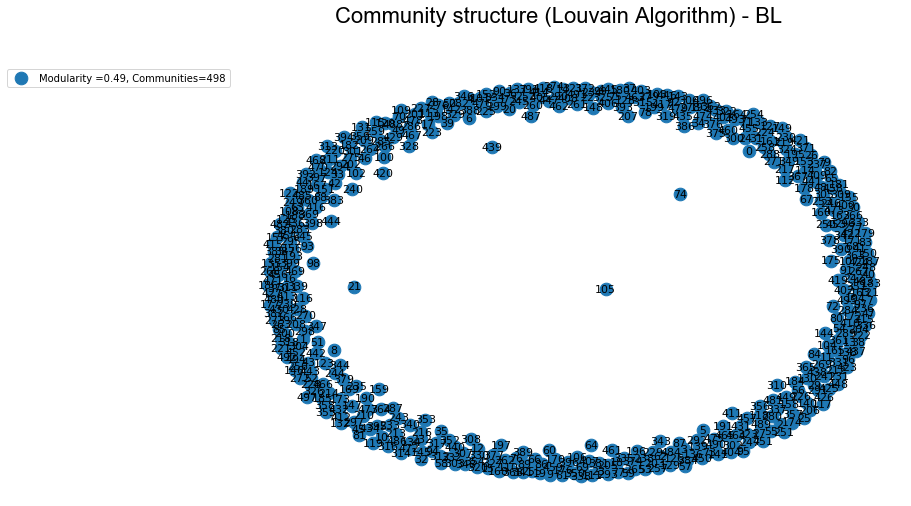

In [28]:
# Creating a new graph to represent the communities created by the Louvain algorithm
matplotlib.rcParams['figure.figsize']= [12, 8]
G_comm=nx.Graph()

# Populating the data from the node dictionary created earlier
G_comm.add_nodes_from(dict_nodes)

# Calculating modularity and the total number of communities
mod=community_louvain.modularity(partition,G)
print("Modularity: ", mod)
print("Total number of Communities=", len(G_comm.nodes()))

# Creating the Graph and also calculating Modularity
matplotlib.rcParams['figure.figsize']= [12, 8]
pos_louvain=nx.spring_layout(G_comm)
nx.draw_networkx(G_comm, pos_louvain, with_labels=True,node_size=160,font_size=11,label='Modularity =' + str(round(mod,3)) +
                    ', Communities=' + str(len(G_comm.nodes())))
plt.suptitle('Community structure (Louvain Algorithm) - BL',fontsize=22,fontname='Arial')
plt.box(on=None)
plt.axis('off')
plt.legend(bbox_to_anchor=(0,1), loc='best', ncol=1)
plt.savefig('C:/....../louvain.png',dpi=400, bbox_inches='tight')

In [29]:
G_comm.nodes()
G_comm.edges()
df.Weights


0        13
1         4
2        13
3        13
4        13
         ..
24350     1
24351     1
24352     1
24353     1
24354     1
Name: Weights, Length: 24355, dtype: int64

In [10]:
# Viewing the list of communities
community_df

,Hashtags
Community_Num,
0,6453 | 19283 | 966 | 11142 | 9833 | 16760 | 11...
1,5923 | 18605 | 15218 | 17188 | 16112 | 19128 |...
2,8901 | 9571 | 11951 | 5266 | 3328 | 3170 | 212...
3,1519 | 7169 | 9598 | 15161 | 1548 | 4635 | 207...
4,19949 | 1514 | 16644 | 5449 | 339 | 2917 | 183...
...,...
331,4905 | 15171
332,8361 | 8400
333,858 | 19470 | 6396 | 502


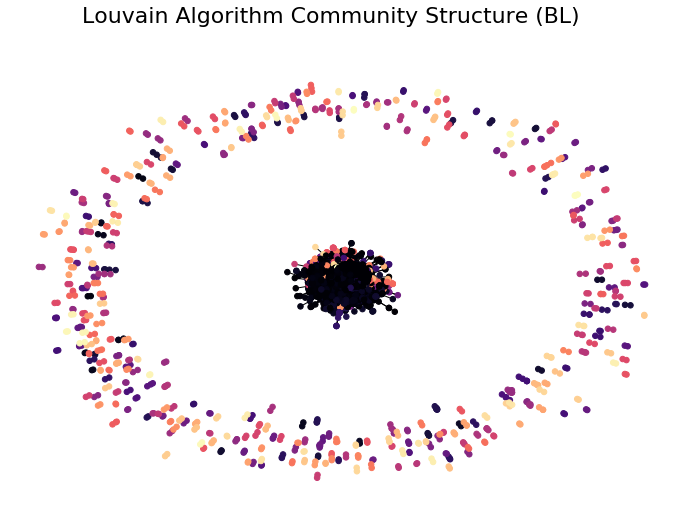

In [30]:

# Now we try to obtain the color coded graph for each community
nx.draw_networkx(G, pos, cmap=plt.get_cmap('magma'), node_color=values,node_size=30, with_labels=False)
plt.suptitle('Louvain Algorithm Community Structure (BL)',fontsize=22)
plt.box(on=None)
plt.axis('off')
plt.savefig('C:/...../louvain_2.png',dpi=400, bbox_inches='tight')
plt.show()

In [31]:
# Using the Girvan-Newman algorithm to create a Communicty Structure
from networkx.algorithms.community.centrality import girvan_newman
from operator import itemgetter


def heaviest(G):
  u, v, w =max(G.edges(data='Weights'), key=itemgetter(2))
  return (u, v)

edges = G.edges()
nx.set_edge_attributes(G, {(u, v): v for u, v in edges}, 'Weights')
comp=girvan_newman(G,most_valuable_edge=heaviest)

#comp=girvan_newman(G)

In [32]:
type(G)
heaviest(G)

(3081, 9457)

In [33]:
# Creating a dictionary for the community number assocaited with each node
com=0
thisdict={}

# Populating the items of the dictionary

for c in next(comp):
    list=sorted(c)
    for i in range(len(list)):
        if list[i] in thisdict:
            print('already found')
        else:
            thisdict.update({list[i]: com})
        i+=1
    com+=1

values_girvan=[thisdict.get(node) for node in G.nodes()]
#values_girvan


In [34]:
#just for illustration
d1=pd.DataFrame.from_dict(thisdict,orient='index', dtype=None) 
d1.tail(50)

,0
2092,364
5728,364
7947,365
8146,365
5360,366
8876,366
1161,367
1228,367
2004,367
8397,367


Total number of Communities= 387



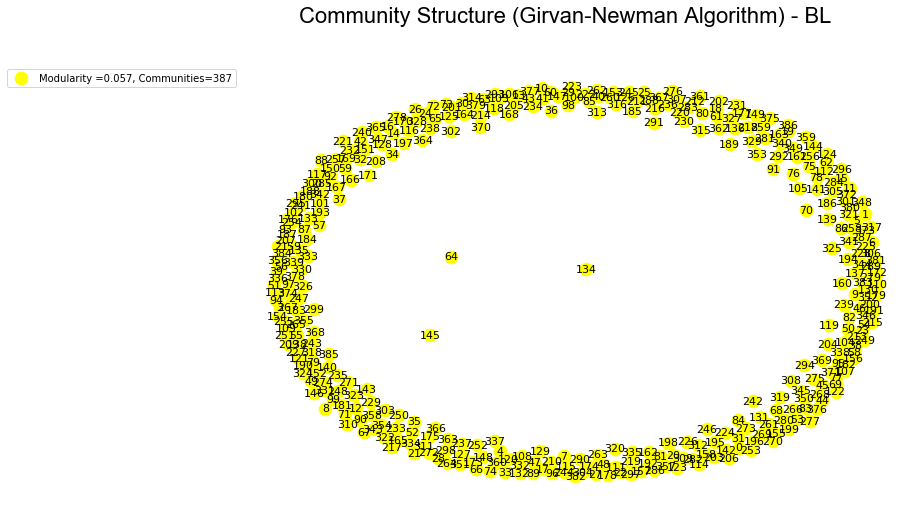

In [35]:
# Creating a dictionary like 'Community num':'List of nodes'
dict_nodes_girvan={}
for each_item in thisdict.items():
    community_num=each_item[1]
    community_node=each_item[0]
    
    if community_num in dict_nodes_girvan:
        value=str(dict_nodes_girvan.get(community_num) )+ ' | ' + str(community_node)
        dict_nodes_girvan.update({community_num: value})
    else:
        dict_nodes_girvan.update({community_num: community_node})
        
# Creating the output file
community_df_girvan=pd.DataFrame.from_dict(dict_nodes_girvan, orient='index',columns=['Hastags'])
community_df_girvan.index.rename('Community Num', inplace=True)
community_df_girvan.to_csv('C:/....../Community_List_girvan_snippet.csv')

# Creating a graph where each node represents a community
G_comm_girvan=nx.Graph()
G_comm_girvan.add_nodes_from(dict_nodes_girvan)

# Calculation of number of communities and modularity
print("Total number of Communities=", len(G_comm_girvan.nodes()))
print(G)
mod_girv=community.modularity(thisdict,G)
#print("Modularity:", mod_girv)



# Creation of the graph

pos_girvan=nx.spring_layout(G_comm_girvan)
nx.draw_networkx(G_comm_girvan, pos_girvan,with_labels=True,node_size=160,font_size=11, node_color='yellow',
                 label='Modularity =' + str(round(mod_girv,3)) +', Communities=' + str(len(G_comm_girvan.nodes())))
plt.suptitle('Community Structure (Girvan-Newman Algorithm) - BL',fontsize=22,fontname='Arial')
plt.box(on=None)
plt.axis('off')
plt.legend(bbox_to_anchor=(0,1), loc='best', ncol=1)
plt.savefig('C:/....../Girvan-Newman.png', dpi=400, bbox_inches='tight')


In [36]:
# Viewing the list of communities
community_df_girvan

,Hastags
Community Num,
0,1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 10 | 11 | 12 |...
1,4015 | 5043
2,7596 | 9124
3,2534 | 7282
4,3789 | 9001
...,...
382,2044 | 6572
383,3584 | 3596
384,785 | 3961


In [37]:
# Finding the Maximal Cliques associated with teh graph
a=nx.find_cliques(G)
i=0

# For each clique, print the members and also print the total number of communities
for clique in a:
    print (clique)
    i+=1
total_comm_max_cl=i
print('Total number of communities: ',total_comm_max_cl)

[8193, 5834]
[2, 3032, 2378]
[4, 4901, 3167]
[7, 8323]
[7, 3582]
[7, 2495]
[8, 1211]
[9, 5169, 8483, 6694]
[8200, 6194, 6830]
[15, 3032, 8823, 7823]
[23, 5393, 5563]
[8215, 602, 3115]
[25, 6869]
[31, 2298, 4578, 8981]
[33, 7829]
[35, 1232]
[36, 7945, 82]
[36, 7835]
[8230, 1997]
[8231, 7514]
[42, 4935]
[44, 5974, 699, 3790]
[45, 1175]
[46, 5257]
[47, 3048]
[48, 5800]
[49, 4473, 5158]
[8236, 4313, 7732]
[8240, 1132]
[53, 431]
[54, 2649, 377, 8063]
[8245, 6129, 3435, 4901]
[8247, 418]
[61, 1232]
[61, 6641]
[61, 8820, 4187, 1918]
[62, 6588]
[63, 3035]
[64, 5418]
[74, 4601, 8749, 2325]
[75, 5539]
[8266, 8897]
[8267, 978]
[8269, 662]
[79, 4883, 9428]
[79, 3755]
[79, 6286, 5851, 3542]
[80, 7276]
[81, 817, 8442, 1700]
[8270, 1462]
[88, 4503]
[90, 3368, 6517]
[8287, 3392]
[8288, 3051, 102]
[97, 7909, 301, 927]
[8290, 9340]
[99, 3032]
[8292, 7686, 5128, 403, 8180, 7095]
[101, 613]
[8293, 5938, 3597]
[8297, 1202, 514]
[106, 2304, 753, 4643]
[108, 8105, 3084, 5297, 2517, 7888]
[108, 8105, 3084, 52

In [38]:
from math import *
import itertools as it

# Defining a circle that can be drawn around each community
def draw_circle_around_clique(clique,coords):
    dist=0
    temp_dist=0
    center=[0 for i in range(2)]
    color=next(colors)
    for a in clique:
        for b in clique:
            temp_dist=(coords[a][0]-coords[b][0])**2+(coords[a][1]-coords[b][1])**2
            if temp_dist>dist:
                dist=temp_dist
                for i in range(2):
                    center[i]=(coords[a][i]+coords[b][i])/2
    rad=dist**0.5/2
    cir=plt.Circle((center[0],center[1]),radius=rad*1.3,fill=False,color=color)
    plt.gca().add_patch(cir)
    plt.axis('scaled')
    return color

# Setting a cycle of colors,
global colors, hatches
colors=it.cycle('b')

Clique to appear :  [8193, 5834]
Clique to appear :  [2, 3032, 2378]
Clique to appear :  [4, 4901, 3167]
Clique to appear :  [7, 8323]
Clique to appear :  [7, 3582]
Clique to appear :  [7, 2495]
Clique to appear :  [8, 1211]
Clique to appear :  [9, 5169, 8483, 6694]
Clique to appear :  [8200, 6194, 6830]
Clique to appear :  [15, 3032, 8823, 7823]
Clique to appear :  [23, 5393, 5563]
Clique to appear :  [8215, 602, 3115]
Clique to appear :  [25, 6869]
Clique to appear :  [31, 2298, 4578, 8981]
Clique to appear :  [33, 7829]
Clique to appear :  [35, 1232]
Clique to appear :  [36, 7945, 82]
Clique to appear :  [36, 7835]
Clique to appear :  [8230, 1997]
Clique to appear :  [8231, 7514]
Clique to appear :  [42, 4935]
Clique to appear :  [44, 5974, 699, 3790]
Clique to appear :  [45, 1175]
Clique to appear :  [46, 5257]
Clique to appear :  [47, 3048]
Clique to appear :  [48, 5800]
Clique to appear :  [49, 4473, 5158]
Clique to appear :  [8236, 4313, 7732]
Clique to appear :  [8240, 1132]
Cl

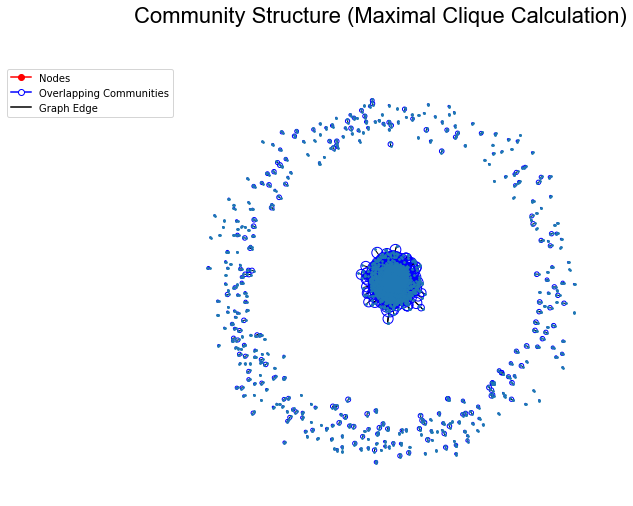

In [39]:
# Remove "len(clique)>2" if you're interested in maxcliques with 2 edges
cliques=[clique for clique in nx.find_cliques(G) if len(clique)>1]

# Draw the graph
nx.draw_networkx(G,pos, node_size=3, with_labels=False)
for clique in cliques:
    print("Clique to appear : ",clique)
    nx.draw_networkx_nodes(G,pos,nodelist=clique,node_color=draw_circle_around_clique(clique,pos),node_size=1000, alpha=0)
plt.suptitle('Community Structure (Maximal Clique Calculation)',fontsize=22, fontname='Arial')
plt.box(on=None)
plt.axis('off')
         
red_patch=mpatches.Patch(color='r', label='Nodes')
#blue_patch = plt.Circle(color='b', label='Overlapping Communities', fill=False)

red_patch=plt.Line2D([],[], color="red", marker='o', markerfacecolor="red",label='Nodes')
blue_patch=plt.Line2D([],[], color="blue", marker='o', markerfacecolor='white',label='Overlapping Communities')
black_patch=plt.Line2D([],[], color="black",label='Graph Edge')
plt.legend(handles=[red_patch,blue_patch, black_patch],bbox_to_anchor=(0,1), loc='best', ncol=1)
plt.savefig('C:/...../Cliques.png',dpi=400, bbox_inches='tight')
plt.show()

In [40]:
print(len(cliques))

9287


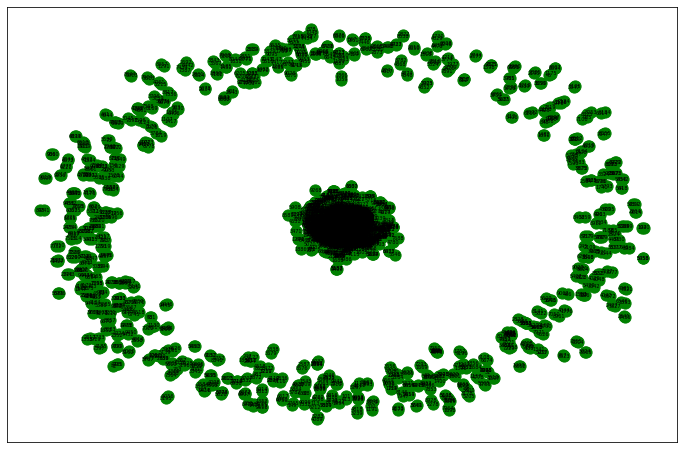

In [41]:
nx.draw_networkx(G, pos,node_color='green', node_size=125, label='Hashtags', font_size=5)
plt.savefig('C:/....../nodes.png',dpi=400)